# Predicting Insuarance claim in Nigeria : A Machine Learning Model

## Problem Statement:
The problem statement is to develop a predictive model that can accurately assess the likelihood of a building in Lagos or other major Nigerian cities experiencing an insurance claim within a specified period. This model will utilize historical data on building characteristics, location, construction quality, maintenance records, and other relevant factors to predict the probability of a claim event. The goal is to assist Olusola Insurance Company in proactively identifying buildings at higher risk and implementing appropriate risk mitigation strategies, ultimately leading to more accurate risk assessment and improved underwriting decisions.




## Data collection:
The data was provided by Zindi Africa.


## Variable definition:

In [1]:
#importing librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading the data
train = pd.read_csv("/content/insuarance_train.csv")
test = pd.read_csv("/content/insuarance_test.csv")
sub = pd.read_csv("/content/submission.csv")

In [3]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [5]:
sub.head()

,Customer_Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0


### Data Cleaning
- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset

In [6]:
train.shape, test.shape, sub.shape

((7160, 14), (3069, 13), (3069, 2))

In [7]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [8]:
test.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [10]:
train.isnull().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,7
Settlement,0
Building Dimension,106
Building_Type,0


In [11]:
test.isnull().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,4
Settlement,0
Building Dimension,13
Building_Type,0


In [12]:
train.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
YearOfObservation,7160.0,2013.669553,1.383769,2012.0,2012.000000,2013.0,2015.00,2016.0
Insured_Period,7160.0,0.909758,0.239756,0.0,0.997268,1.0,1.00,1.0
Residential,7160.0,0.305447,0.460629,0.0,0.000000,0.0,1.00,1.0
Building Dimension,7054.0,1883.727530,2278.157745,1.0,528.000000,1083.0,2289.75,20940.0
Building_Type,7160.0,2.186034,0.940632,1.0,2.000000,2.0,3.00,4.0
Date_of_Occupancy,6652.0,1964.456404,36.002014,1545.0,1960.000000,1970.0,1980.00,2016.0
Claim,7160.0,0.228212,0.419709,0.0,0.000000,0.0,0.00,1.0


In [15]:
train.describe(include='object').T

,count,unique,top,freq
Customer Id,7160,7160,H14663,1
Building_Painted,7160,2,V,5382
Building_Fenced,7160,2,N,3608
Garden,7153,2,O,3602
Settlement,7160,2,R,3610
NumberOfWindows,7160,11,.,3551
Geo_Code,7058,1307,6088,143


In [16]:
train.apply(lambda x: len(x.unique()))

,0
Customer Id,7160
YearOfObservation,5
Insured_Period,401
Residential,2
Building_Painted,2
Building_Fenced,2
Garden,3
Settlement,2
Building Dimension,2044
Building_Type,4


**Key takeaways**
- Both the train and test have the same columns names which means with a have a consistent data.
- The data contains both categorical and numerical columns.
- Both the train and test data have missing variables which we will handle through imputation or dropping.
- Data has no duplicates.


## Expolatory data analysis

In [17]:
# Getting all different types of features
num_features = [feature for feature in train.columns if train[feature].dtype != 'O']
print(f'Numerical Features:', num_features)

cat_features = [feature for feature in train.columns if train[feature].dtype == 'O']
print(f'Categorical Features:', cat_features)

discrete_features = [feature for feature in num_features if len(train[feature].unique()) <= 25]
print(f'Discrete Features:', discrete_features)

continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(f'Continuous Features:', continuous_features)

Numerical Features: ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim']
Categorical Features: ['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']
Discrete Features: ['YearOfObservation', 'Residential', 'Building_Type', 'Claim']
Continuous Features: ['Insured_Period', 'Building Dimension', 'Date_of_Occupancy']


## Numerical columns

In [18]:
Numerical_columns = train.select_dtypes(include=np.number).columns
Numerical_columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim'],
      dtype='object')

### Insured_Period

In [19]:
train.Insured_Period.value_counts()

,count
Insured_Period,
1.000000,5325
0.997268,547
0.000000,165
0.747945,60
0.495890,49
...,...
0.435616,1
0.308743,1
0.437158,1


Majority of the values are 1.0000 we are going to bin the values into two majority and minority

In [20]:
def period_bin(col):
    if col['Insured_Period'] == 1.000000:
        return 1
    else:
        return 0

train['period_bin'] = train.apply(period_bin, axis=1)
test['period_bin'] = test.apply(period_bin, axis=1)

In [21]:
train['period_bin'].value_counts()

,count
period_bin,
1,5325
0,1835


### Building Dimension

In [22]:
train['Building Dimension'].value_counts()

,count
Building Dimension,
400.0,150
500.0,120
300.0,118
450.0,117
600.0,114
...,...
1046.0,1
763.0,1
5464.0,1


<Axes: xlabel='Building Dimension', ylabel='Density'>

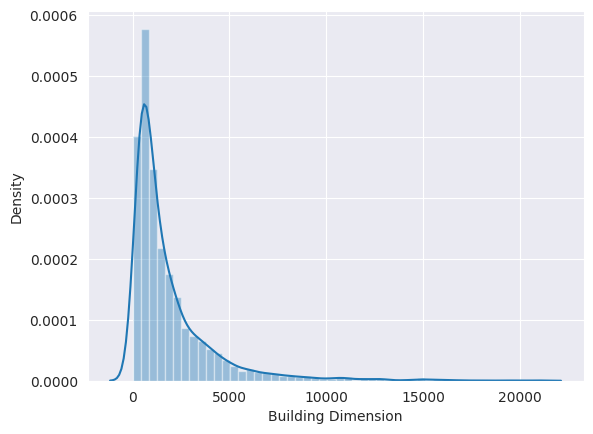

In [23]:
sns.distplot(train['Building Dimension'],kde=True)

- Right Positive Skew: The tail on the right side is longer, so most data points are concentrated on the left. This means there are some high values (outliers) stretching the data to the right.We will perform log transformation on the column to compress high values.Before that lets handle the missing values

In [24]:
train['Building Dimension'] = train['Building Dimension'].fillna(train['Building Dimension'].mean())
test['Building Dimension'] = test['Building Dimension'].fillna(test['Building Dimension'].mean())

<Axes: xlabel='Building Dimension', ylabel='Count'>

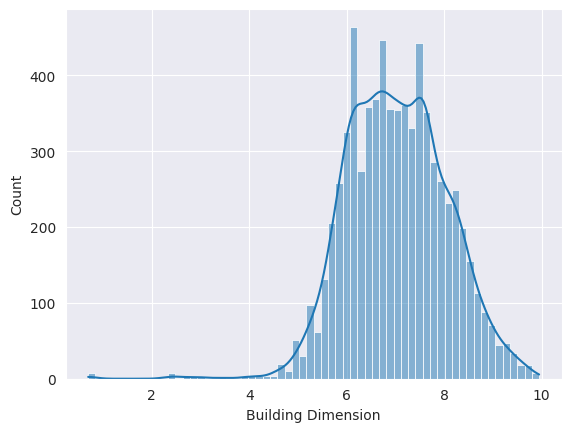

In [25]:
# Apply log transformation
train['Building Dimension'] = np.log1p(train['Building Dimension'])
test['Building Dimension'] = np.log1p(test['Building Dimension'])

sns.histplot(train['Building Dimension'], kde=True)


That now looks better.

### Date_of_Occupancy

In [26]:
train.Date_of_Occupancy.value_counts()

,count
Date_of_Occupancy,
1960.0,1818
1980.0,1155
1988.0,530
1900.0,371
1970.0,285
...,...
1931.0,1
1824.0,1
1914.0,1


<Axes: xlabel='Date_of_Occupancy', ylabel='Density'>

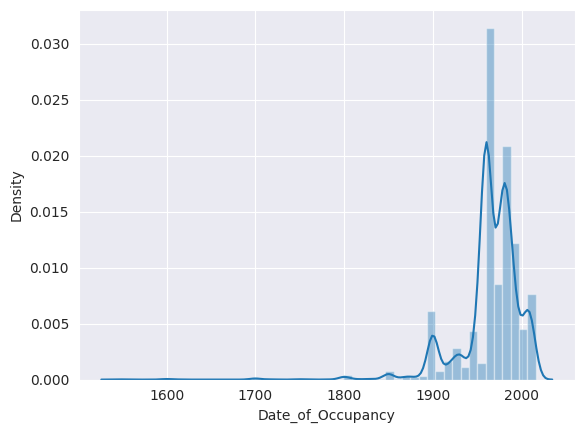

In [27]:
sns.distplot(train['Date_of_Occupancy'],kde=True)

Let's address the tail first, as these values are not typical (or we can assume they aren't). We'll replace any year before 1900 with 1900. Additionally, we can categorize the years into bins such as "Pre-1900", "1900-1950", "1950-2000", and "2000-Present". But before we do that, let's handle the missing values. For the missing data, we can fill these values with an earlier year, assuming that they are sufficiently old and the first date of occupancy might not be known. Instead of using the mode, we'll use 1900, as we're capping all years before that to 1900.

In [28]:
train['Date_of_Occupancy'] = train['Date_of_Occupancy'].fillna(1900)
test['Date_of_Occupancy'] = test['Date_of_Occupancy'].fillna(1900)

In [29]:
def Occupancy_bins(x):
    if x <= 1900:
        return '<=1900'
    elif x > 1900 and x <= 1950:
        return '1901-1950'
    elif x > 1950 and x <=2000:
        return '1951-2000'
    elif x> 41:
        return '2000-2016'#2016 is the max year
train['Occupancy_bins'] = train['Date_of_Occupancy'].apply(Occupancy_bins)
test['Occupancy_bins'] = test['Date_of_Occupancy'].apply(Occupancy_bins)
train['Occupancy_bins'].value_counts()

,count
Occupancy_bins,
1951-2000,4756
<=1900,1054
1901-1950,679
2000-2016,671


We can make a comment that the other continous variables are actually categorical apart from Building Dimension.Next we go to the discrete features.

### Year of Observation,Residential,Building type

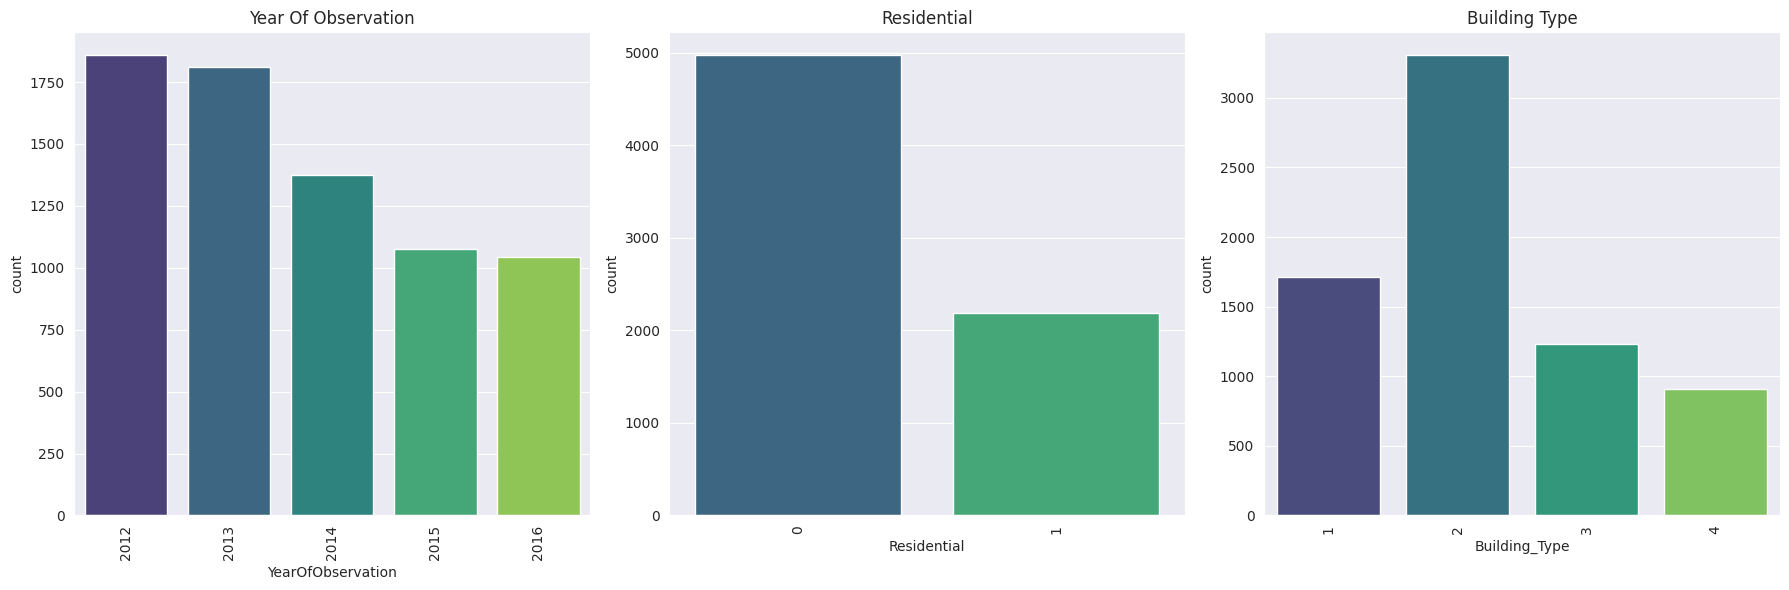

In [30]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting  the count of each column
sns.countplot(x='YearOfObservation', data=train, palette='viridis', ax=axes[0])
axes[0].set_title('Year Of Observation')
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x='Residential', data=train, palette='viridis', ax=axes[1])
axes[1].set_title('Residential')
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(x='Building_Type', data=train, palette='viridis', ax=axes[2])
axes[2].set_title('Building Type')
axes[2].tick_params(axis='x', rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


## Categorical columns

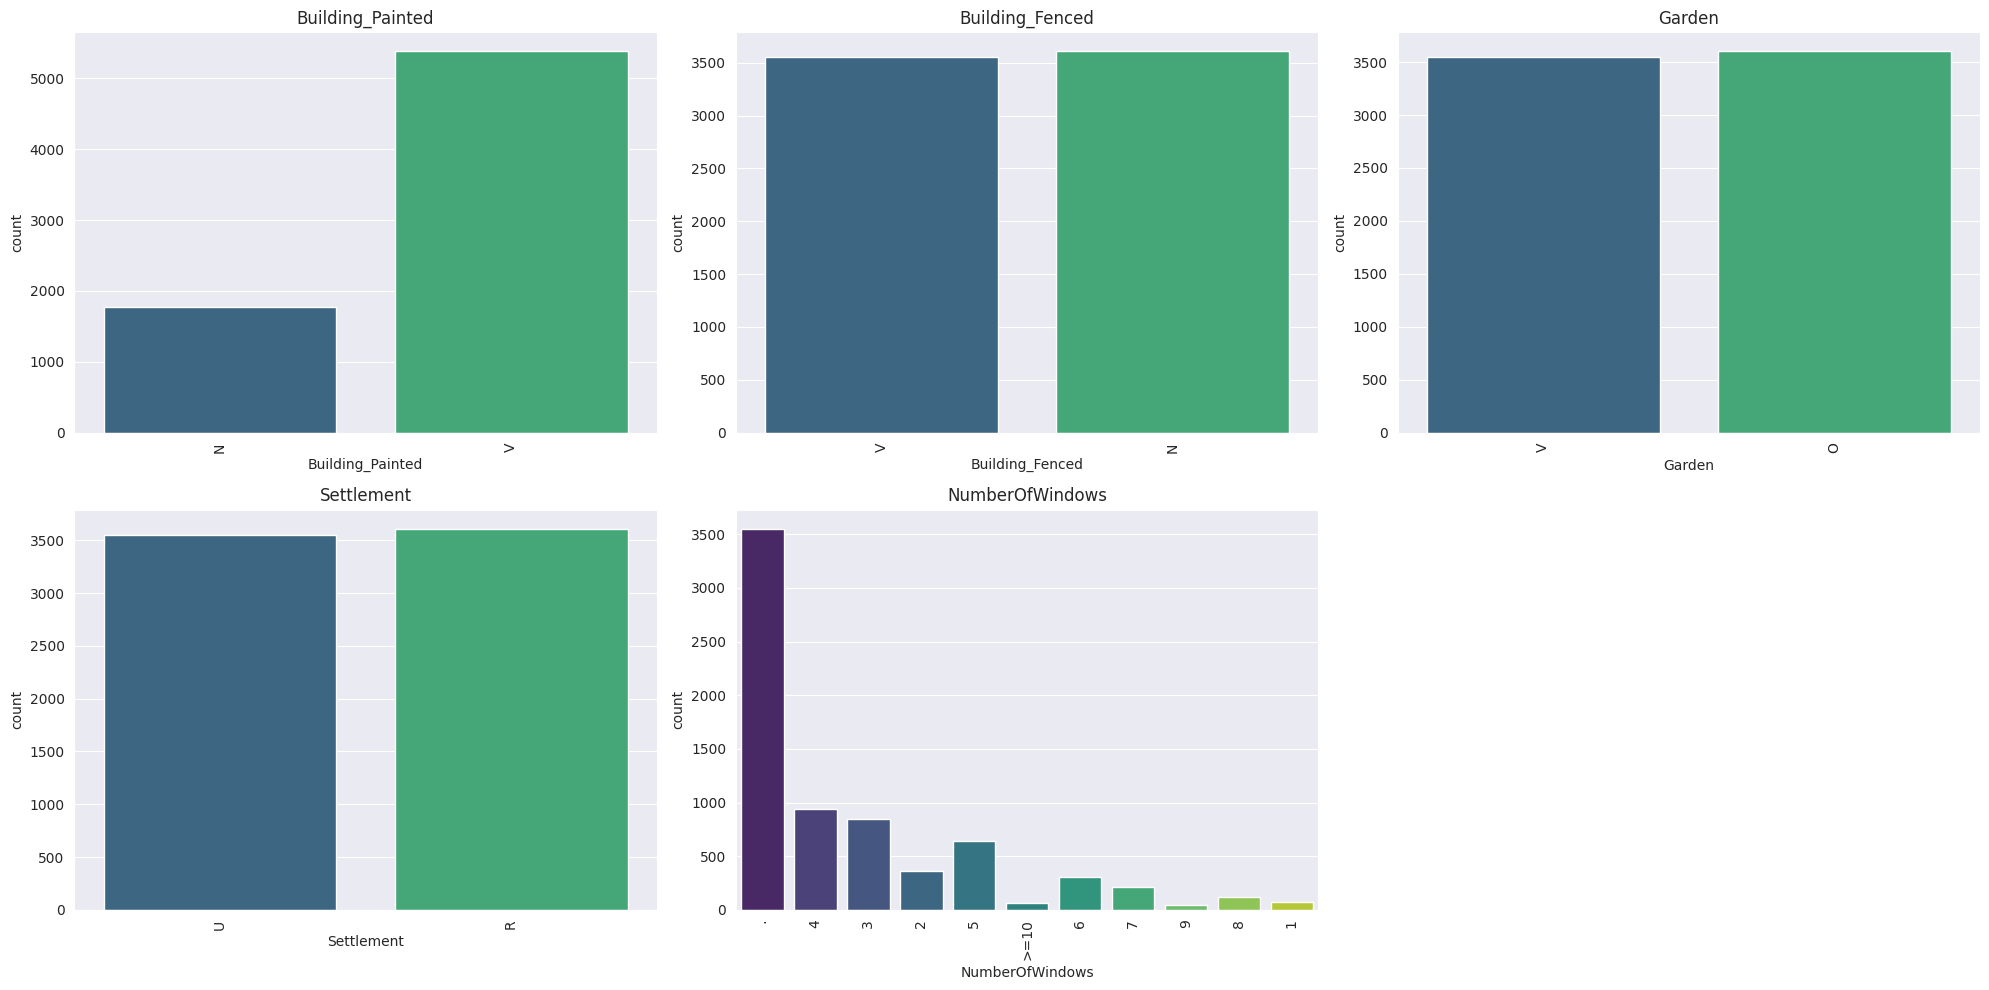

In [31]:

# List of columns to plot
columns = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows']


fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

# Plot each column's count on a separate subplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=train, palette='viridis', ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

# Remove the empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [32]:
train['NumberOfWindows'].value_counts()

,count
NumberOfWindows,
.,3551
4,939
3,844
5,639
2,363
6,306
7,211
8,116
1,75


In [33]:
def windows_bins(x):
    majority = ['   .']
    others = ['4','3','5','2','6','7','8','1','>=10','9']

    if x in majority:
        return 'majority'
    elif x in others:
        return 'minority'

train['NumberOfWindows'] = train['NumberOfWindows'].apply(windows_bins)
test['NumberOfWindows'] = test['NumberOfWindows'].apply(windows_bins)



*   Building fenced,Garden and Settlement seem to have an equal distribution.
*   Building Painted and Number of windows have an imbalanced distribution as other variables have more values than the others.



In [34]:
# handling missing values in categorical columns
train['Garden'] = train['Garden'].fillna(train['Garden'].mode()[0])
test['Garden'] = test['Garden'].fillna(test['Garden'].mode()[0])

train['Geo_Code'] = train['Geo_Code'].fillna(train['Geo_Code'].mode()[0])
test['Geo_Code'] = test['Geo_Code'].fillna(test['Geo_Code'].mode()[0])

### Encoding
As we can see our data is mainly categorical with only one column being numerical.Apart from the traditional One hot and label encoder we will try some few other encoding to capture some trends in the data.

- **Count Encoding:** Replaces each category with the number of times it appears. Helps the model understand category popularity. Reduces data size by avoiding one-hot encoding.

- **Frequency Encoding:** Replaces each category with its proportion in the dataset. Scales values between 0 and 1, providing a normalized measure of frequency. Useful for models needing scaled features.

- **Groupby Mean Encoding:** Replaces each category with the average target value for that category. Shows the direct relationship between category and target. Effective in indicating category-specific trends.

- **Difference Encoding:** Encodes each category by the difference between its mean target and the overall target mean. Highlights categories above or below the average target. Useful for emphasizing deviations from the norm.

In [35]:
# CONCATENATING BOTH THE TEST AND TRAIN FOR EASY DATA MANIPULATON
ntrain = train.shape[0]
ntest = test.shape[0]
data = pd.concat((train, test)).reset_index(drop=True)

In [36]:
data.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim', 'period_bin', 'Occupancy_bins'],
      dtype='object')

#### Count Encoding

In [37]:
col = ['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'period_bin', 'Occupancy_bins']

for feature in col:
    # Count encoding for each column and store it as a new column with '_count' suffix
    data[f'{feature}_count'] = data[feature].map(data[feature].value_counts())

# Display the first few rows to check the new encoded columns
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,...,Building_Fenced_count,Garden_count,Settlement_count,Building Dimension_count,Building_Type_count,Date_of_Occupancy_count,NumberOfWindows_count,Geo_Code_count,period_bin_count,Occupancy_bins_count
0,H14663,2013,1.0,0,N,V,V,U,5.673323,1,...,5792,5795,5790,15,2288,2632,5791,5,7714,6713
1,H2037,2015,1.0,0,V,N,O,R,6.196444,1,...,4437,4434,4439,18,2288,62,4438,5,7714,1880
2,H3802,2014,1.0,0,N,V,V,U,6.390241,1,...,5792,5795,5790,4,2288,2632,5791,5,7714,6713
3,H3834,2013,1.0,0,V,V,V,U,7.951911,1,...,5792,5795,5790,1,2288,2632,5791,5,7714,6713
4,H5053,2014,1.0,0,V,N,O,R,6.523562,1,...,4437,4434,4439,25,2288,29,4438,5,7714,1880


### Frequency Encoding:

In [38]:
for feature in col:
    # Frequency encoding for each column and store it as a new column with '_freq' suffix
    freq = data[feature].value_counts(normalize=True)
    data[f'{feature}_freq'] = data[feature].map(freq)

# Display the first few rows to check the new encoded columns
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,...,Building_Fenced_freq,Garden_freq,Settlement_freq,Building Dimension_freq,Building_Type_freq,Date_of_Occupancy_freq,NumberOfWindows_freq,Geo_Code_freq,period_bin_freq,Occupancy_bins_freq
0,H14663,2013,1.0,0,N,V,V,U,5.673323,1,...,0.566233,0.566527,0.566038,0.001466,0.223678,0.257308,0.566135,0.000489,0.75413,0.656271
1,H2037,2015,1.0,0,V,N,O,R,6.196444,1,...,0.433767,0.433473,0.433962,0.001760,0.223678,0.006061,0.433865,0.000489,0.75413,0.183791
2,H3802,2014,1.0,0,N,V,V,U,6.390241,1,...,0.566233,0.566527,0.566038,0.000391,0.223678,0.257308,0.566135,0.000489,0.75413,0.656271
3,H3834,2013,1.0,0,V,V,V,U,7.951911,1,...,0.566233,0.566527,0.566038,0.000098,0.223678,0.257308,0.566135,0.000489,0.75413,0.656271
4,H5053,2014,1.0,0,V,N,O,R,6.523562,1,...,0.433767,0.433473,0.433962,0.002444,0.223678,0.002835,0.433865,0.000489,0.75413,0.183791


### One hot encoding

In [39]:

from sklearn.preprocessing import OneHotEncoder

# Select the columns for encoding
Ohe_cols = ['Occupancy_bins', 'Residential', 'Building_Painted',
            'Building_Fenced', 'Garden', 'Settlement', 'Building_Type']

Ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = Ohe.fit_transform(data[Ohe_cols])

# Convert the encoded array to a DataFrame and add column names
encoded_df = pd.DataFrame(encoded_data, columns=Ohe.get_feature_names_out(Ohe_cols))

# Concatenate the new encoded columns with the original DataFrame
data = pd.concat([data.drop(Ohe_cols, axis=1), encoded_df], axis=1)


data.head()


,Customer Id,YearOfObservation,Insured_Period,Building Dimension,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,period_bin,YearOfObservation_count,...,Occupancy_bins_2000-2016,Occupancy_bins_<=1900,Residential_1,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U,Building_Type_2,Building_Type_3,Building_Type_4
0,H14663,2013,1.0,5.673323,1960.0,majority,1053,0.0,1,2587,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,H2037,2015,1.0,6.196444,1850.0,minority,1053,0.0,1,1554,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,H3802,2014,1.0,6.390241,1960.0,majority,1053,0.0,1,1930,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,H3834,2013,1.0,7.951911,1960.0,majority,1053,0.0,1,2587,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,H5053,2014,1.0,6.523562,1800.0,minority,1053,0.0,1,1930,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Label encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_cols = ['YearOfObservation', 'Insured_Period', 'Geo_Code','Date_of_Occupancy',
           'NumberOfWindows']
for col in le_cols:
    data[col] = le.fit_transform(data[col])

In [41]:
data.head()

,Customer Id,YearOfObservation,Insured_Period,Building Dimension,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,period_bin,YearOfObservation_count,...,Occupancy_bins_2000-2016,Occupancy_bins_<=1900,Residential_1,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U,Building_Type_2,Building_Type_3,Building_Type_4
0,H14663,1,466,5.673323,82,0,7,0.0,1,2587,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,H2037,3,466,6.196444,16,1,7,0.0,1,1554,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,H3802,2,466,6.390241,82,0,7,0.0,1,1930,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,H3834,1,466,7.951911,82,0,7,0.0,1,2587,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,H5053,2,466,6.523562,8,1,7,0.0,1,1930,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


We are going to add some statistical features of each row to help  improve the model’s ability to learn patterns and make accurate predictions.

In [42]:
def add_stats(data, feats):
    # Store the current number of columns in the DataFrame
    before_ = data.shape[1]

    # Specify the columns (features) to calculate statistics on
    cols = feats

    # Calculate the minimum value across the specified columns for each row
    data['f_min'] = data[cols].fillna(0).min(axis=1)

    # Calculate the maximum value across the specified columns for each row
    data['f_max'] = data[cols].fillna(0).max(axis=1)

    # Calculate the mean (average) value across the specified columns for each row
    data['f_mean'] = data[cols].fillna(0).mean(axis=1)

    # Calculate the standard deviation (spread) across the specified columns for each row
    data['f_sd'] = data[cols].fillna(0).std(axis=1)

    # Calculate the median (middle value) across the specified columns for each row
    data['f_median'] = data[cols].fillna(0).median(axis=1)

    # Calculate the sum of values across the specified columns for each row
    data['f_sum'] = data[cols].fillna(0).sum(axis=1)

    # Calculate the skewness (asymmetry) across the specified columns for each row
    data['f_skew'] = data[cols].fillna(0).skew(axis=1)

    # Store the updated number of columns after adding new features
    after_ = data.shape[1]

    # Get a list of the names of newly added columns
    new_cols = data.iloc[:, before_:after_].columns.tolist()

    # Return the updated DataFrame with new features and the list of new columns
    return data, new_cols


# For example, if you want to use all numeric columns, you can use:
feats = data.select_dtypes(include=['number']).columns.tolist()
# Apply the add_stats function to your data
data, new_cols = add_stats(data, feats)

In [43]:
data.head()

,Customer Id,YearOfObservation,Insured_Period,Building Dimension,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,period_bin,YearOfObservation_count,...,Building_Type_2,Building_Type_3,Building_Type_4,f_min,f_max,f_mean,f_sd,f_median,f_sum,f_skew
0,H14663,1,466,5.673323,82,0,7,0.0,1,2587,...,0.0,0.0,0.0,0.0,7714.0,1360.124825,2530.178355,1.00000,63925.866793,1.618923
1,H2037,3,466,6.196444,16,1,7,0.0,1,1554,...,0.0,0.0,0.0,0.0,7714.0,1147.030153,2337.493308,0.75413,53910.417189,1.963795
2,H3802,2,466,6.390241,82,0,7,0.0,1,1930,...,0.0,0.0,0.0,0.0,7714.0,1345.947200,2525.169972,1.00000,63259.518406,1.643752
3,H3834,1,466,7.951911,82,0,7,0.0,1,2587,...,0.0,0.0,0.0,0.0,7714.0,1442.947353,2651.886561,1.00000,67818.525574,1.527168
4,H5053,2,466,6.523562,8,1,7,0.0,1,1930,...,0.0,0.0,0.0,0.0,7714.0,1154.293160,2339.917105,0.75413,54251.778524,1.948480


In [44]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 2200

data.isnull().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Building Dimension,0
Date_of_Occupancy,0
NumberOfWindows,0
Geo_Code,0
Claim,3069
period_bin,0
YearOfObservation_count,0


### Separate the combined dataset

In [45]:
# Separate train and test data from the combined dataframe
Train = data[:ntrain]
Test = data[ntrain:]

# Check the shapes of the split dataset
Train.shape, Test.shape

((7160, 55), (3069, 55))

In [46]:
# Saving the data to model building
Train.to_csv('train_1.csv',index=False)
Test.to_csv('test_1.csv',index=False)